# ✈ Flight Fare Prediction Dataset EDA 

## Problem Statment
* Airline companies want to calculate flight prices. These methods take financial, marketing, and various social factors into account to predict flight prices.
* Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions.
*  Here we have flight tickets data for various airlines between March and June of 2019 and between various cities. Size of training set: 10683 records.

## Data source
* Data was taken from kaggle.com , link to same is given below.
* link: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh?datasetId=140442&sortBy=voteCount&searchQuery=eda

### Essential initializations

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading the data

In [2]:
df = pd.read_excel(r"Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Understanding data

In [3]:
df.shape

(10683, 11)

In [4]:
df.ndim

2

**Observations**
* Number of variables = 11
* Number of rows = 10683
* 2 dimensional dataframe

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

**Feature Information**
1. **Airline**:- Name of the airline used for traveling.
2. **Date_of_Journey**:- Date at which a person traveled.
3. **Source**:- Starting location of flight.
4. **Destination**:- Ending location of flight.
5. **Route**:- This contains information on starting and ending location of the journey in the standard format used by airlines.
6. **Dep_Time**:- Departure time of flight from starting location.
7. **Arrival_Time**:- Arrival time of flight at destination.
8. **Duration**:- Duration of flight in hours/minutes.
9. **Total_Stops**:- Number of total stops flight took before landing at the destination.
10. **Additional_Info**:- Shown any additional information about a flight.
11. **Price**:- Price of the flight. (Target)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Observations**

* All except 1 column is object type.
* The only numeric data is Price column (this is the target of our problem statment)
* The data seems complete, with only 1 missing value
* The data is not in a useful form
    - Route should be removed as we already know it in  splits, source and destination (we have Total_Stops for counting middle stops)
    - Duration should also be converted in to minutes to avoid confustion and computation easy
    - Additional_Info looks like have most values as no info, probably drop it (recheck with other ways before dropping)

**Rechecking for null values**

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Droping the only missing data row**
* As data is missing only in 1 row, we will drop it.

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Duration to minutes**
* Creating a custom function and applying on data frame

In [9]:
def toMins(string_ele):
    total_time = 0
    for s in string_ele.split():
        if 'h' in s:
            h = int(s[:-1])*60
            total_time += h
        if 'm' in s:
            m = int(s[:-1])
            total_time += m
        return total_time

In [10]:
df["Duration"]= df.Duration.apply(toMins)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,120,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,420,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,300,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,240,1 stop,No info,13302


**Looking at the Additional_info column for its usefulness**

In [11]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

**Observations**
* most of data is "No info" and rest others are too less to include in the dataset to draw conclusions.

**Checking data once more for any missed info**

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,120,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,420,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,300,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,240,1 stop,No info,13302


**Observations**

* we can see some discrepeny in the Arrival_Time column( some ties includes date as well)
* safer side we will convert  Dep_Time and	Arrival_Time data into pure time data.

In [13]:
df['Dep_Time']= pd.to_datetime(df.Dep_Time).dt.time
df['Arrival_Time']= pd.to_datetime(df.Arrival_Time).dt.time
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,120,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,420,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,300,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,240,1 stop,No info,13302


**Exploring catagorical data only**

In [14]:
cat_col=[fea for fea in df.columns if df[fea].dtypes == 'O']
df[cat_col].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,1 stop,No info


In [15]:
df[cat_col].describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,223,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55:00,19:00:00,1 stop,No info
freq,3849,504,4536,4536,2376,233,618,5625,8344


* 12 Airlines operate in India of which Jet Airways has most flights
* most flights are from Delhi to Cochin
* major flights are singe stop

**Exploring numerical data only**

In [16]:
num_col=[fea for fea in df.columns if df[fea].dtypes != 'O']
df[num_col].head()

,Duration,Price
0,120,3897
1,420,7662
2,1140,13882
3,300,6218
4,240,13302


In [17]:
df[num_col].describe()

,Duration,Price
count,10682.000000,10682.000000
mean,614.694346,9087.214567
std,509.694384,4611.548810
min,5.000000,1759.000000
25%,120.000000,5277.000000
50%,480.000000,8372.000000
75%,900.000000,12373.000000
max,2820.000000,79512.000000


**Observations**

* average journey duration is of 480 minutes
* max duration is 2820 minutes which is very huge (almost 2 days), this seems very odd and might have many outliers
* Prices range from 1759 to 79512, we can assume that there are no flights costing less than 1500 and some flights are very expensive

**Checking and Removing duplicates**

In [18]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35:00,04:25:00,780,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00:00,19:15:00,1260,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15:00,19:15:00,1560,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30:00,04:25:00,1320,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25:00,21:20:00,120,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05:00,12:35:00,780,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40:00,12:35:00,1560,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40:00,12:35:00,1560,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05:00,19:00:00,1140,2 stops,In-flight meal not included,11150


**Observation**
* We can see some duplicate entries
* Quantitizing those and removing them if number is less

In [19]:
df.duplicated().sum()

222

In [20]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


## Statistics (graph based)

### Univariate Analysis

**Numerical Data**

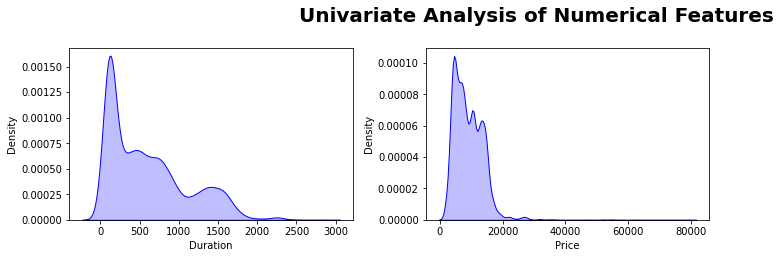

In [21]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', y =1)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]], shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

**Report**
*  Both features are right skewed
* There are outliers in duration as observed earlier (Price is a Target feature)

**Categorical Data**

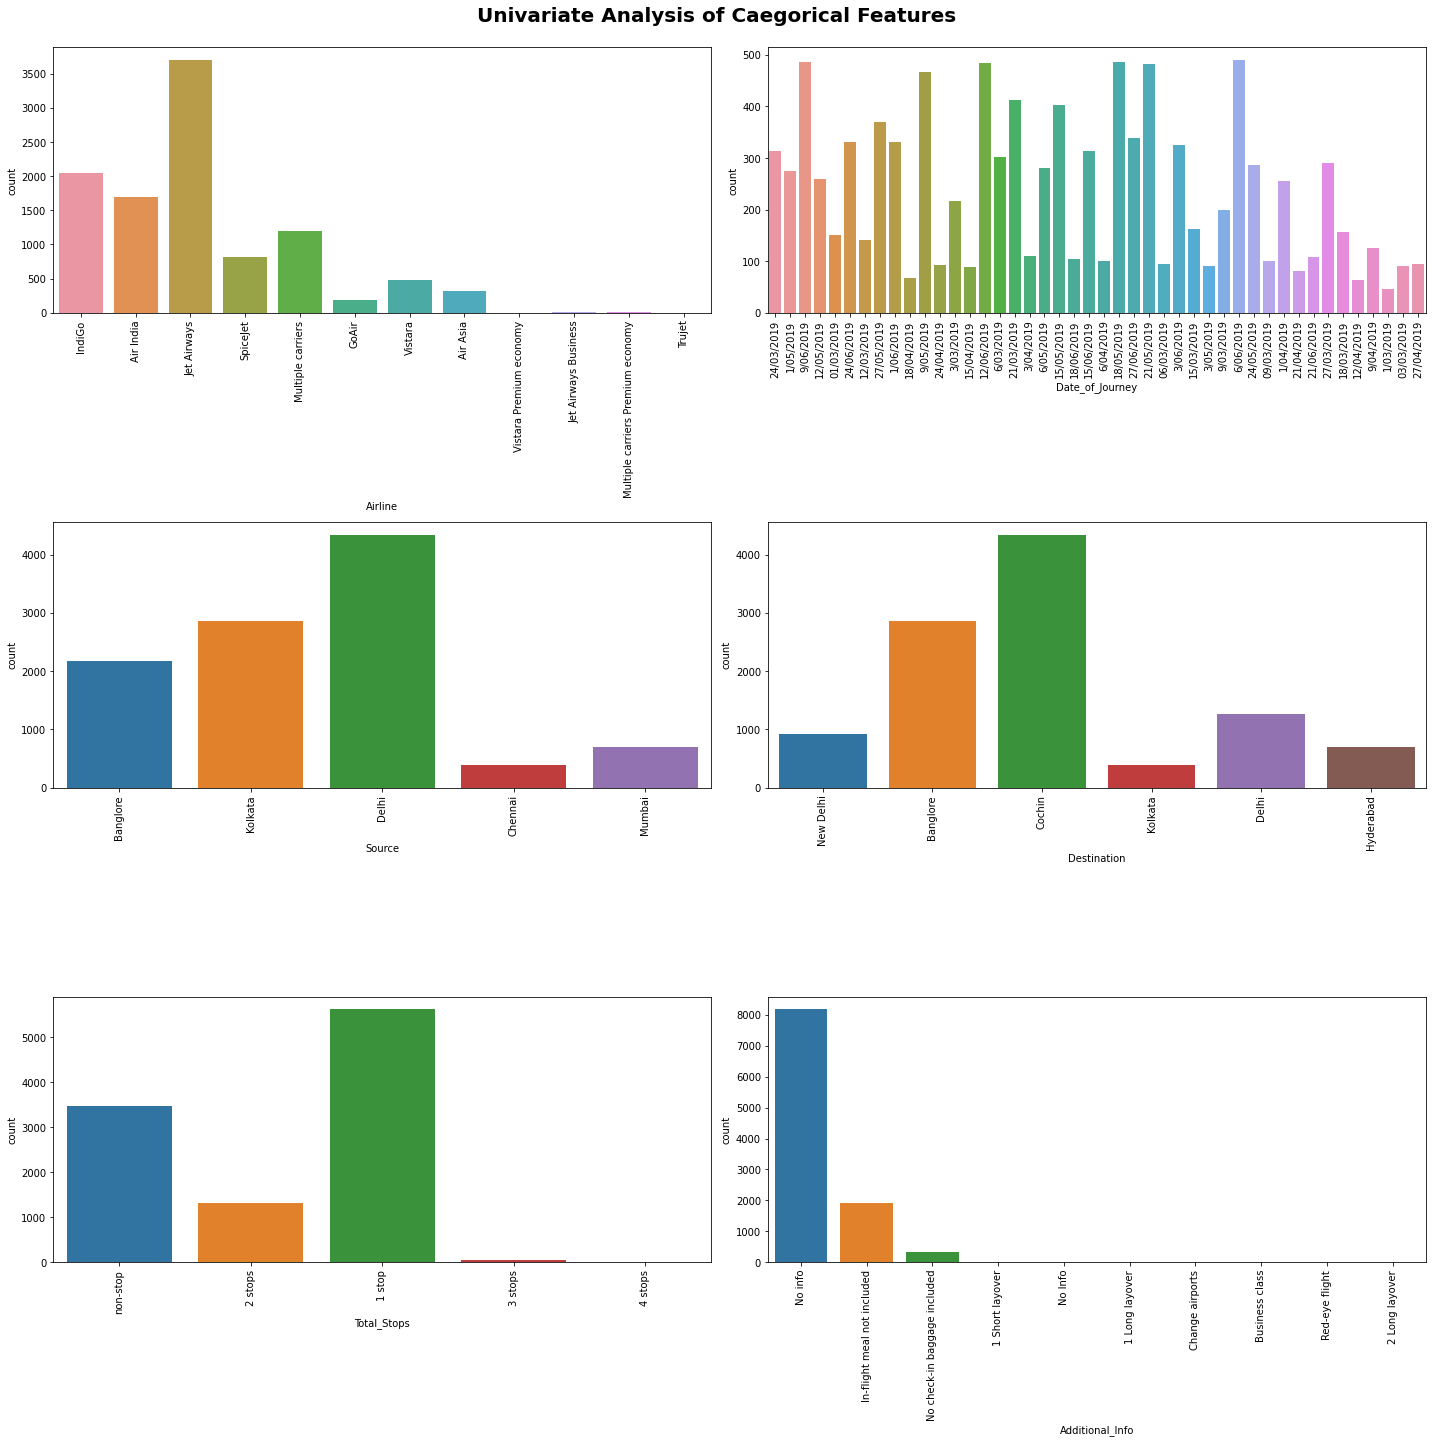

In [22]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Caegorical Features', fontsize=20, fontweight='bold', y =1)
cat_special = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

for i in range(0, len(cat_special)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cat_special[i]])
    plt.xlabel(cat_special[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

### Multivariate Analysis

**Getting the co-relation(numerical data)**

In [23]:
corelation = df[list(df.columns)[1:]].corr()
corelation

,Duration,Price
Duration,1.000000,0.504154
Price,0.504154,1.000000


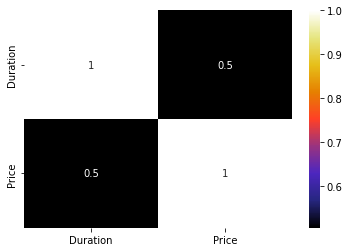

In [24]:
sns.heatmap(corelation, cmap="CMRmap", annot = True)
plt.show()

**Another way to see co-relation**

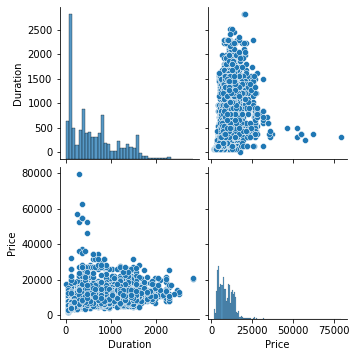

In [25]:
sns.pairplot(df)
plt.show()

**Multivariate analysis for categorical data**

In [26]:
from scipy.stats import chi2_contingency as c2c
chi2_test = []
for col in cat_col:
    if c2c(pd.crosstab(df['Price'], df[col]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Reject Null Hypothesis
1,Date_of_Journey,Reject Null Hypothesis
2,Source,Reject Null Hypothesis
3,Destination,Reject Null Hypothesis
4,Route,Reject Null Hypothesis
5,Dep_Time,Reject Null Hypothesis
6,Arrival_Time,Reject Null Hypothesis
7,Total_Stops,Reject Null Hypothesis
8,Additional_Info,Reject Null Hypothesis


**Observation**
* Here we tested correlation of Categorical columns with Target column i.e Price but in vain

## Visualization
**Getting some insights by visualizing the data**

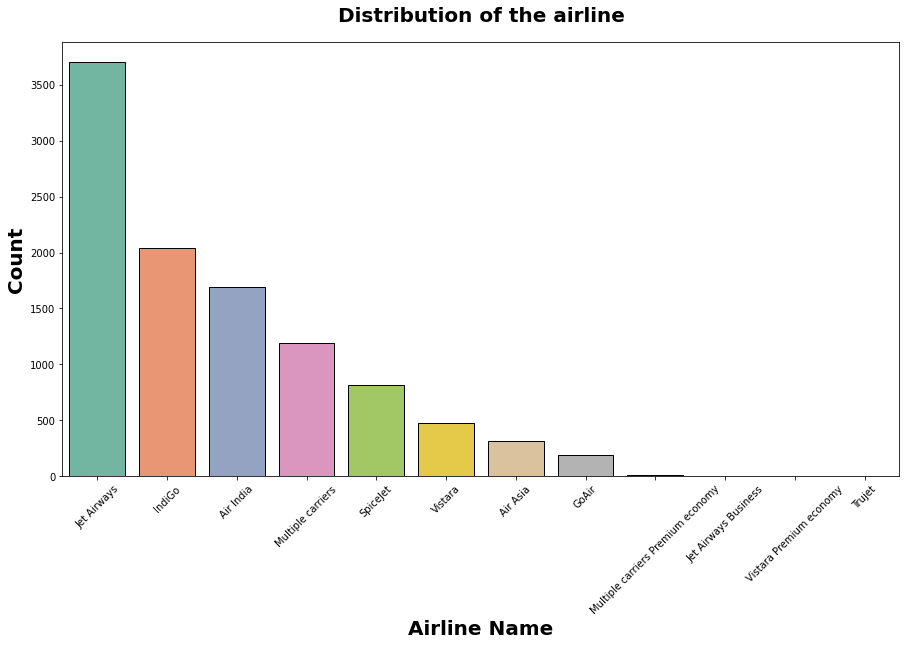

In [27]:
# Distribution of Airlines

plt.figure(figsize=(15,8))
sns.countplot(x="Airline", data=df, ec = "black",palette="Set2",order = df["Airline"].value_counts().index)
plt.title("Distribution of the airline", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=20)
plt.xticks(rotation= 45)
plt.show()

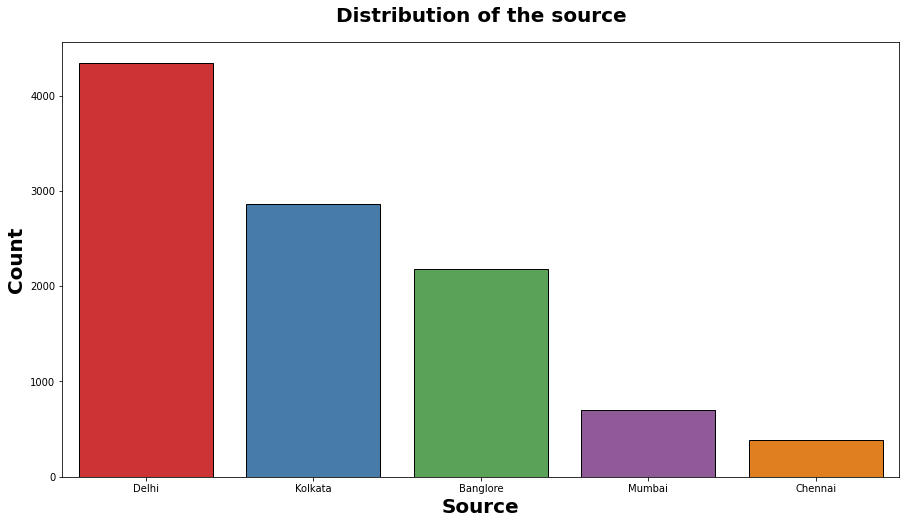

In [28]:
# Distribution of the source

plt.figure(figsize=(15,8))
sns.countplot(x="Source", data=df, ec = "black",palette="Set1",order = df["Source"].value_counts().index)
plt.title("Distribution of the source", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Source", weight="bold", fontsize=20)
plt.show()

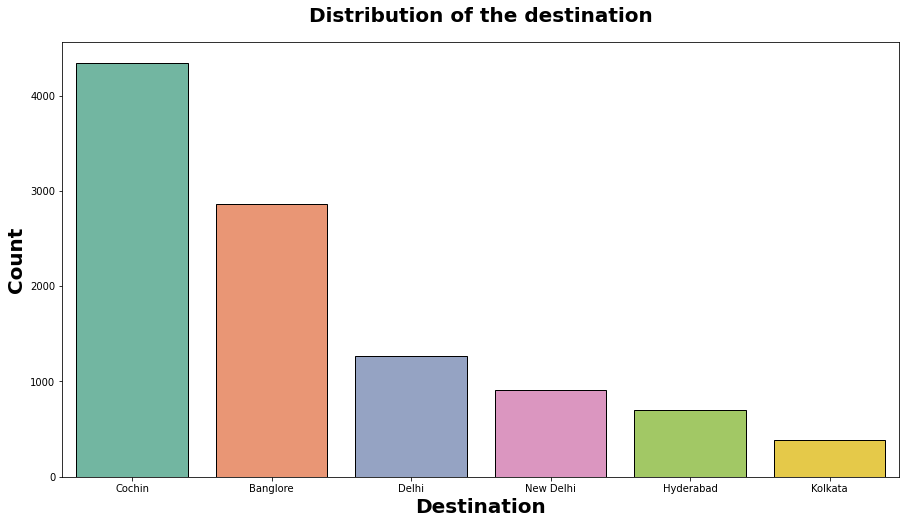

In [29]:
# Distribution of the destination

plt.figure(figsize=(15,8))
sns.countplot(x="Destination", data=df, ec = "black",palette="Set2",order = df["Destination"].value_counts().index)
plt.title("Distribution of the destination", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Destination", weight="bold", fontsize=20)
plt.show()

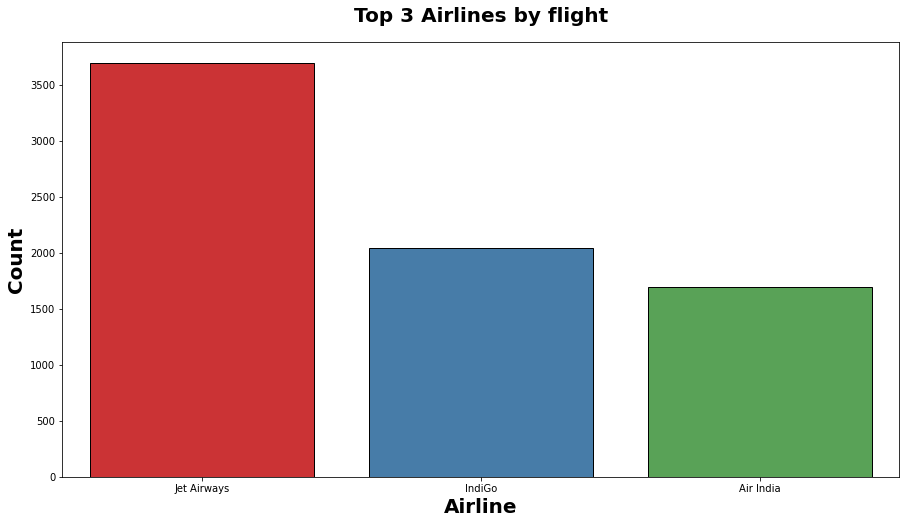

In [30]:
# Top 3 Airlines by flight

plt.figure(figsize=(15,8))
sns.countplot(x=df['Airline'], order=df["Airline"].value_counts().iloc[:3].index, ec = "black",palette="Set1",)
plt.title("Top 3 Airlines by flight",weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline", weight="bold", fontsize=20)
plt.show()

In [31]:
# Top 5 Expensive Airlines

# plt.figure(figsize=(15,8))
# sns.barplot(x='Airline', y ='Price', data=df,order=df.sort_values('Price', ascending = False).Airline, palette="Set2")
# plt.title("Top 5 Expensive Airlines", weight = "bold", fontsize = 20, pad = 20)
# plt.ylabel("Price", weight = "bold", fontsize = 20)
# plt.xlabel("Airline", weight = "bold", fontsize = 20)
# plt.show()

In [32]:
# Top 5 Inexpensive Airlines

# plt.figure(figsize=(15,8))
# sns.barplot(x='Airline', y ='Price', data=df,order=df.sort_values('Price').Airline, palette="Set1")
# plt.title("Top 5 Inexpensive Airlines", weight = "bold", fontsize = 20, pad = 20)
# plt.ylabel("Price", weight = "bold", fontsize = 20)
# plt.xlabel("Airline", weight = "bold", fontsize = 20)
# plt.show()

In [33]:
df_viz  = df.iloc[:]
df_viz.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

df_viz.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,120,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,420,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,300,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,240,1,No info,13302


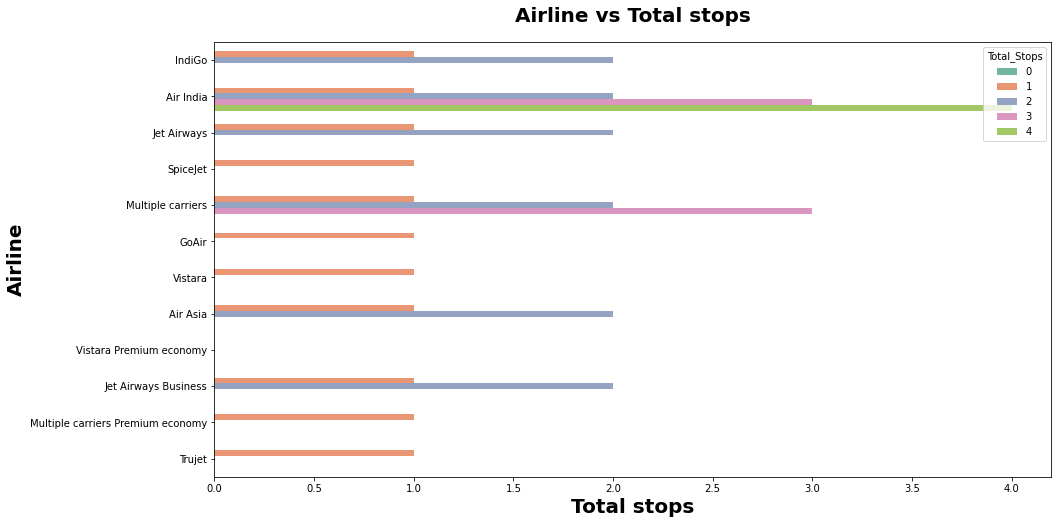

In [34]:
# Airlines vs Total stops

plt.figure(figsize=(15,8))
sns.barplot(y = "Airline", x = "Total_Stops", data = df_viz, hue="Total_Stops", palette="Set2")
plt.title("Airline vs Total stops", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Airline", weight = "bold", fontsize = 20)
plt.xlabel("Total stops", weight = "bold", fontsize = 20)
plt.show()

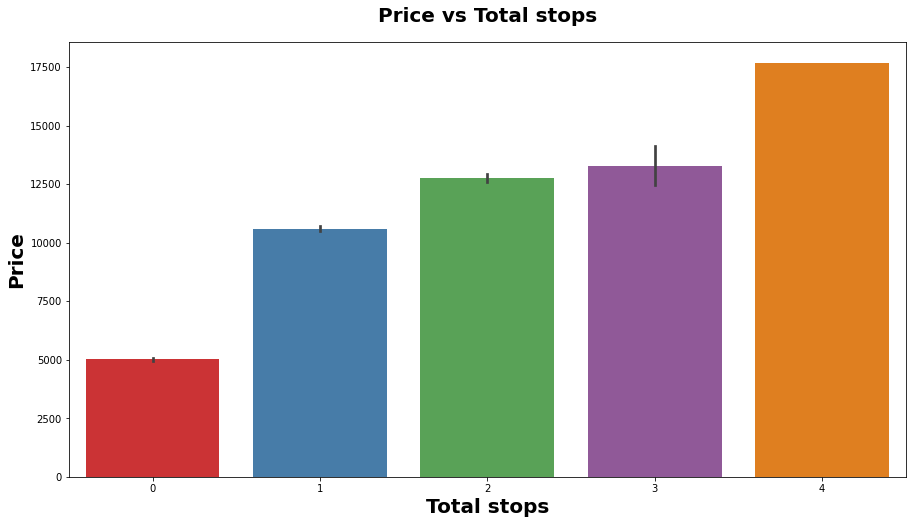

In [35]:
# Price vs Total stops

plt.figure(figsize=(15,8))
sns.barplot(y = "Price", x = "Total_Stops", data = df.sort_values("Total_Stops", ascending = False),  palette="Set1")
plt.title("Price vs Total stops", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Price", weight = "bold", fontsize = 20)
plt.xlabel("Total stops", weight = "bold", fontsize = 20)
plt.show()

In [36]:
# adding a day name column to the data

df_viz['Journey_Day'] = pd.to_datetime(df_viz['Date_of_Journey'], format='%d/%m/%Y').dt.day_name()
df_viz

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,120,0,No info,3897,Sunday
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,420,2,No info,7662,Wednesday
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2,No info,13882,Sunday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,300,1,No info,6218,Sunday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,240,1,No info,13302,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,120,0,No info,4107,Tuesday
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,120,0,No info,4145,Saturday
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,180,0,No info,7229,Saturday
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,120,0,No info,12648,Friday


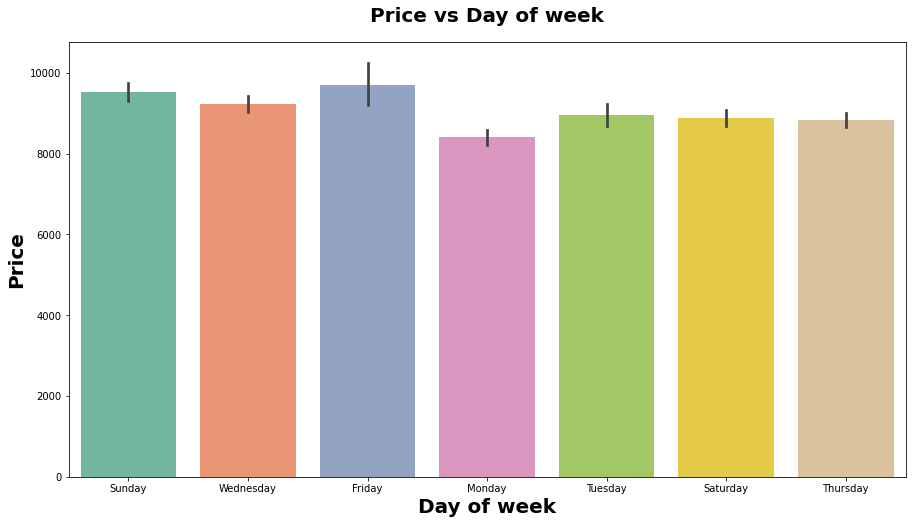

In [37]:
#Journey_Day vs Price

plt.figure(figsize=(15,8))
sns.barplot(x='Journey_Day', y='Price', data=df_viz,  palette="Set2")
plt.title("Price vs Day of week", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Price", weight = "bold", fontsize = 20)
plt.xlabel("Day of week", weight = "bold", fontsize = 20)
plt.show()

## Summary

### Insights

1. **Airlines**:- Jet Airways is the most popular airline, followed by Indigo and AirIndia.
2. **Source**:-Majority of the flights take off from Delhi.Chennai having the least.
3. **Destination**:-Maximum flights land in Cochin.Kolkata having the least.
4. **Total stops**:-Majority of the flights have stops as 1. Flights having more stops are bit expensive and non stop flights are cheapest.
5. Flights onn Friday are most expensive and cheapest on Monday

### Dataset observations
1. Route data is redundant.
2. Aditional_info is least helpful in the model and can  be dropped.
3. There are outliers that can be handeled
4. Skewed data can be scaled properly
5. We can also perfom encoding on categorical data if we are not using a model handling categorical data.